**Backpropagation**

Empezamos con las mismas funciones que en forwardprop.

Notar que en la función forward se ha añadido Z a los valores que devuelve, ya que también necesitamos conocer el valor de la hidden layer

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def forward(X, W1, b1, W2, b2):
  Z = 1 / (1 + np.exp(-X.dot(W1)- b1))
  A = np.exp(Z.dot(W2)+b2)
  Y = A / A.sum(axis=1, keepdims=True)
  return Y, Z 

def classification_rate(Y,P):
  n_correct = 0
  n_total = 0
  for i in range(len(Y)):
    n_total += 1
    if Y[i] == P[i]:
      n_correct += 1
  return n_correct/n_total


Definimos las funciones derivadas que necesitamos.

También creamos la función de coste o función de error

In [ ]:
def derivative_w2(Z, T, Y):
  N, K = T.shape
  M = Z.shape[1]
  return (Z.T).dot(T - Y) #revisar

def derivative_b2(T, Y):
  return (T - Y).sum(axis=0)



def cost(T, Y):
  tot = T * np.log(Y)
  return tot.sum()

Añadimos main() para crear los datos como antes, añadiendo T para Targets y los volvemos a visualizar

También añadimos un for para realizar gradient ascend (para quitarnos el signo -) y mostrar el coste cada 100 pasos

cost:  -1110.2641830706339 classification rate:  0.572


NameError: ignored

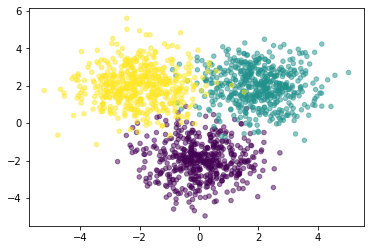

In [ ]:
def main():
  Nclass = 500
  D = 2
  M = 3
  K = 3

  X1 = np.random.randn(Nclass,D) + np.array([0,-2])
  X2 = np.random.randn(Nclass,D) + np.array([2,2])
  X3 = np.random.randn(Nclass,D) + np.array([-2,2])
  X = np.vstack([X1,X2,X3])

  Y = np.array([0]*Nclass + [1]*Nclass + [2]*Nclass)
  N = len(Y)

  T = np.zeros((N,K))
  for i in range(N):
    T[i,Y[i]] = 1

  plt.scatter(X[:,0],X[:,1], c=Y, s = 20, alpha=0.5);

  W1 = np.random.randn(D,M)
  b1 = np.random.randn(M)
  W2 = np.random.randn(M,K)
  b2 = np.random.randn(K)

  learning_rate = 10e-7
  costs = []

  for epoch in range(100000):
    output, hidden = forward(X,W1,b1,W2,b2)
    if epoch % 100 == 0:
      c = cost(T, output)
      P = np.argmax(output, axis=1)
      r = classification_rate(Y,P)
      print("cost: ", c, "classification rate: ", r)
      costs.append(c)

    W2 += learning_rate * derivative_w2(hidden, T, output)
    b2 += learning_rate * derivative_b2(T, output)
    W1 += learning_rate * derivative_w1(X, hidden, T, output, W2)
    b1 += learning_rate * derivative_b1(hidden, T, output, W2)

  plt.plot(costs);

if __name__ == '__main__':
  main()

NameError: ignored